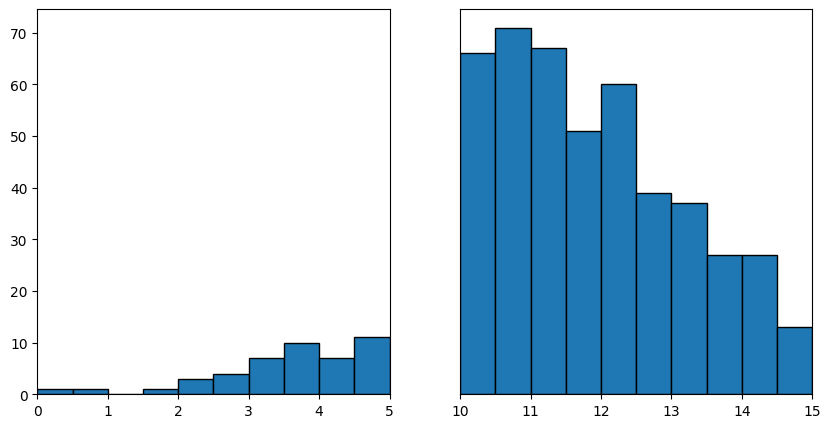

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.normal(loc=10, scale=3, size=1000)

# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Create histogram for the range 0-5
ax1.hist(data[data <= 5], bins=np.linspace(0, 5, 11), edgecolor='black')

# Create histogram for the range 10-15
ax2.hist(data[data >= 10], bins=np.linspace(10, 15, 11), edgecolor='black')

# Set x-axis limits and ticks
ax1.set_xlim(0, 5)
ax1.set_xticks(np.arange(0, 6, 1))
ax1.set_ylim(0, ax1.get_ylim()[1])  # Ensure same y-axis scale for both subplots

ax2.set_xlim(10, 15)
ax2.set_xticks(np.arange(10, 16, 1))

# Remove y-axis from the second subplot
ax2.yaxis.set_visible(False)

plt.show()

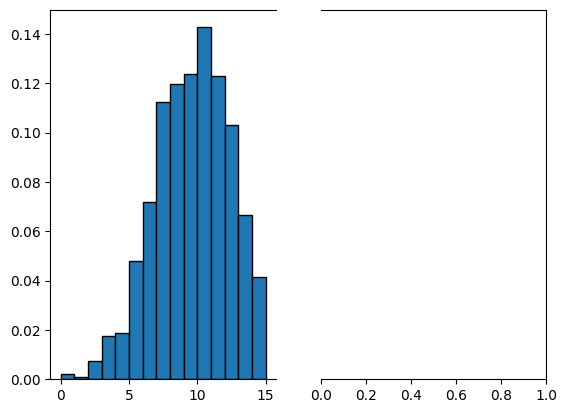

In [19]:
f,(ax,ax2)= plt.subplots(1, 2, sharey=True, facecolor='w')
ax.hist(data, bins=bins, edgecolor='black',density=True)
ax2.get_yaxis().set_visible(False)
ax2.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

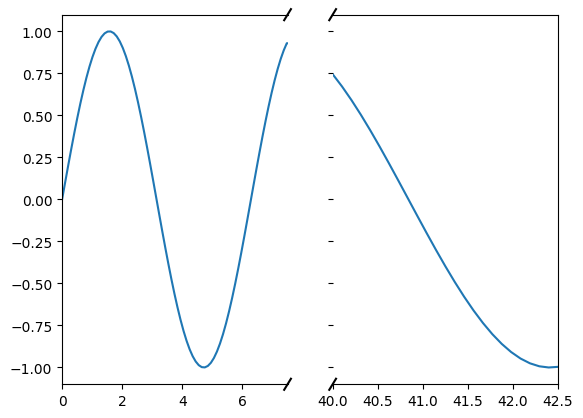

In [18]:
x = np.linspace(0,10,100)
x[75:] = np.linspace(40,42.5,25)

y = np.sin(x)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x, y)
ax2.plot(x, y)

ax.set_xlim(0, 7.5)
ax2.set_xlim(40, 42.5)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()